# Logistic Regression

## Importing the libraries

In [17]:
import pandas as pd
import numpy as np
from pprint import pprint

## Importing the dataset

In [18]:
dataset = pd.read_csv('../Dataset/breast_cancer_wisconsin.csv')

In [19]:
print("Dataset Information");
print("__________________________")
pprint(dataset.info());
print("\n")
print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Dataset Information
__________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


Number of null data:

__________________________
Clump_thickness                 0
Uniformity_

Proccess null value:

In [20]:
threshold = 0.05;

if dataset.isna().sum().sum() / dataset.size < threshold:
    dataset = dataset.dropna()
else:
    for col in dataset.columns:
        if dataset[col].dtype in ['float64', 'int64']:
            # Điền NaN bằng mean cho dữ liệu số
            dataset[col] = dataset[col].fillna(dataset[col].mean())
        else:
            # Điền NaN bằng giá trị phổ biến nhất cho dữ liệu dạng object/categorical
            dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

print("Number of null data:\n")
print("__________________________")
pprint(pd.isnull(dataset).sum())

Number of null data:

__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


## Declare features and dependant variables

On the features, remove the "Sample code number" because it is not relevant to the prediction

In [21]:
X = dataset.iloc[:,1:-1].values;
pprint(X)


array([[ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [ 4.,  4.,  5., ...,  3.,  2.,  1.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [10., 10.,  3., ...,  8., 10.,  2.],
       [ 8.,  6.,  4., ..., 10.,  6.,  1.],
       [ 8.,  8.,  5., ..., 10.,  4.,  1.]])


In [22]:
y = dataset.iloc[:, -1].values;
pprint(y);

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

print("DataSet Splitting:\n");
print("_______________________________")
print("X_train: ", np.size(X_train));
print("X_test: ", np.size(X_test));
print("y_train:", np.size(y_train));
print("y_test", np.size(y_test));


DataSet Splitting:

_______________________________
X_train:  4368
X_test:  1096
y_train: 546
y_test 137


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Feature Scaling Applied Successfully!")
print("_____________________________________")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nTraining set - First 5 samples after scaling:")
pprint(X_train[:5])
print("\nTest set - First 5 samples after scaling:")
pprint(X_test[:5])

Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 8)
X_test shape: (137, 8)

Training set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747, -0.54871998,  1.81553572,
         0.61907387,  0.34532102, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.99789705, -0.68279599,
        -0.18860673, -0.62157783, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.54871998, -0.68279599,
        -0.18860673, -0.62157783, -0.33863738],
       [-0.69781134, -0.40497291, -0.63363747, -0.54871998, -0.68279599,
        -0.59244703, -0.62157783, -0.33863738],
       [-0.37244414, -0.06842008, -0.63363747,  1.24798832, -0.12761116,
         1.42675446, -0.62157783, -0.33863738]])

Test set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747, -0.54871998,  0.42757366,
        -0.99628733, -0.62157783, -0.33863738],
       [-0.69781134, -0.74152574, -0.63363747, -0.54871998, 

## Training the Logistic Regression model on the Training set

In [25]:
from sklearn.linear_model import LogisticRegression;
classifier_logistic_regression = LogisticRegression(random_state=0);
classifier_logistic_regression.fit(X_train, y_train);

## Predicting the Test set results

In [26]:
y_pred = classifier_logistic_regression.predict(X_test);
pprint(y_pred)

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2], dtype=int64)


## Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix;

cm = confusion_matrix(y_test, y_pred);
pprint(cm)

array([[83,  4],
       [ 3, 47]], dtype=int64)


## Visualizing the Training set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_15772\2230037095.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


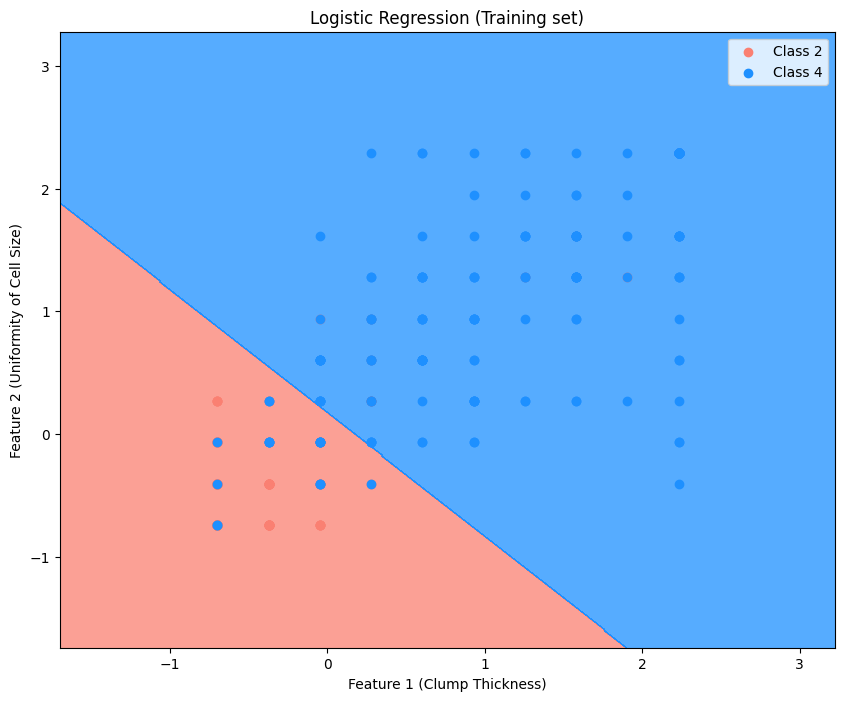

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# We'll use only the first two features for visualization (since we can't visualize 9D)
X_set, y_set = X_train[:, [0, 1]], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a temporary classifier with only 2 features
classifier_2d = LogisticRegression(random_state=0)
classifier_2d.fit(X_set, y_set)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

## Visualizing the Test set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_15772\3227167957.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


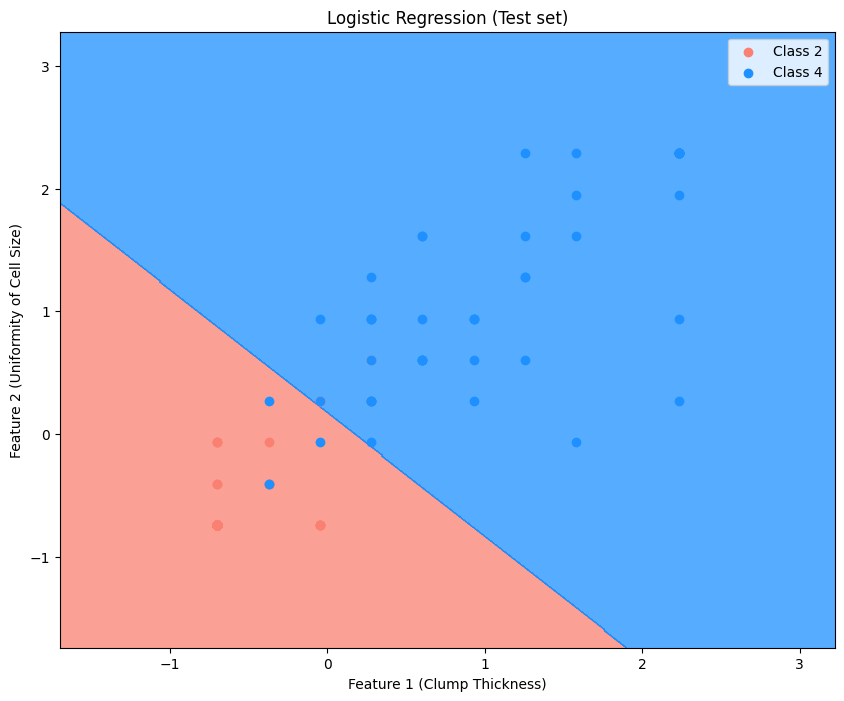

In [29]:
# Visualize Test set results using the same 2 features
X_set, y_set = X_test[:, [0, 1]], y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, classifier_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = f'Class {j}')
plt.title('Logistic Regression (Test set)')
plt.xlabel('Feature 1 (Clump Thickness)')
plt.ylabel('Feature 2 (Uniformity of Cell Size)')
plt.legend()
plt.show()

## Computing the accuracy with k-Fold Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score;

accuracies = cross_val_score(estimator=classifier_logistic_regression, X=X_train, y=y_train, cv=10);
print("Accuracies:  ", format(accuracies.mean() * 100), " %")
print("Standard Deviation:  ", format(accuracies.std() * 100), " %")

Accuracies:   96.51515151515152  %
Standard Deviation:   2.5192408802192543  %
